In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [5]:
DATASET_NAME = 'depthmap-469k'

In [3]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = ''
resource_group = ''
workspace_name = ''

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='depthmap-469k')
# dataset.download(target_path='.', overwrite=False)

In [4]:
dataset

Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'


{
  "source": [
    "('cgmmlciproddsetds', 'dataset-depthmap-Train-2022-11-13-08-38-14/**')"
  ],
  "definition": [
    "GetDatastoreFiles"
  ],
  "registration": {
    "id": "d9b3d52d-0d68-438e-a1ba-d97893fa7f78",
    "name": "depthmap-469k",
    "version": 2,
    "description": "Updated with new labels like workflow id, pose score, joint scores",
    "workspace": "Workspace.create(name='cgm-ml-prod-ci-azml', subscription_id='9b5bbfae-d5d1-4aae-a2ca-75159c0c887d', resource_group='cgm-ml-prod-ci-rg')"
  }
}

In [6]:
from azureml.core import Workspace, Dataset

# Connect to Workspace and reference Dataset
ws = Workspace.from_config()
dataset = ws.datasets[DATASET_NAME]

# Create mountcontext and mount the dataset
mount_ctx = dataset.mount()  
mount_ctx.start()  

Message: Running rslex direct volume mount: RSLEX_DIRECT_VOLUME_MOUNT=None, RSLEX_DIRECT_VOLUME_WRITABLE_MOUNT=None, enable_rslex_mount=None
Payload: {"pid": 9746, "version": "4.9.5"}
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'


In [7]:
# Get the mount point
dataset_mount_folder = mount_ctx.mount_point
print(dataset_mount_folder)

# List the files in the mount point
files = os.listdir(dataset_mount_folder)
print(files)

/tmp/tmp4piaag_t
['labels.csv', 'scans']


In [8]:
df = pd.read_csv(os.path.join(dataset_mount_folder, 'labels.csv'))

In [9]:
df.shape

(469694, 20)

In [10]:
# total number of folders/children
scans_path = os.path.join(dataset_mount_folder, 'scans')
print(scans_path)
scans_f = os.listdir(scans_path)
len(scans_f)

/tmp/tmp4piaag_t/scans


12426

In [12]:
df.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,artifact,depth_artifact_id,device_model,person_id,age,sex,zscore_wfh,diagnosis_wfh,zscore_lhfa,diagnosis_lhfa
0,1666261245701/e38a7e90-f7a5-4450-bdf4-cb42f20f...,2022-10-20-10-20-45-716142,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,1.0,depth,dc0a52e0-5060-11ed-b963-6304f6be8d3c,ec731181-5060-11ed-b963-d32f1d7a7623,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted
1,1666261245920/c9df29af-ed53-422f-ba9d-9a6d7ff1...,2022-10-20-10-20-45-934872,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,2.0,depth,dc2be4a0-5060-11ed-b963-e73e4d30b61f,ec731182-5060-11ed-b963-13bf389e7bc6,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted
2,1666261246076/3fad8c07-b5a2-48d9-a1c4-90ea1f9d...,2022-10-20-10-20-46-091125,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,3.0,depth,dc444ea0-5060-11ed-b963-c751e911b26f,ec731183-5060-11ed-b963-83183cde8720,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted
3,1666261246242/6c7dc054-822e-4cca-9e14-597c0eff...,2022-10-20-10-20-46-247400,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,4.0,depth,dc5b3200-5060-11ed-b963-2307acfb9376,ec731184-5060-11ed-b963-73833ba6dfd2,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted
4,1666261246506/28130fea-282c-4195-9771-4d992452...,2022-10-20-10-20-46-513029,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,5.0,depth,dc8464e0-5060-11ed-b963-8f070ce06b25,ec761ec0-5060-11ed-b963-130a31c8c361,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted


In [13]:
# df.rename(columns={'age_rgb': 'age'}, inplace=True)
df['Years'] = df.apply(convert_age_from_days_to_years, axis=1)
df.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,artifact,depth_artifact_id,device_model,person_id,age,sex,zscore_wfh,diagnosis_wfh,zscore_lhfa,diagnosis_lhfa,Years
0,1666261245701/e38a7e90-f7a5-4450-bdf4-cb42f20f...,2022-10-20-10-20-45-716142,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,1.0,depth,dc0a52e0-5060-11ed-b963-6304f6be8d3c,ec731181-5060-11ed-b963-d32f1d7a7623,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4
1,1666261245920/c9df29af-ed53-422f-ba9d-9a6d7ff1...,2022-10-20-10-20-45-934872,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,2.0,depth,dc2be4a0-5060-11ed-b963-e73e4d30b61f,ec731182-5060-11ed-b963-13bf389e7bc6,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4
2,1666261246076/3fad8c07-b5a2-48d9-a1c4-90ea1f9d...,2022-10-20-10-20-46-091125,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,3.0,depth,dc444ea0-5060-11ed-b963-c751e911b26f,ec731183-5060-11ed-b963-83183cde8720,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4
3,1666261246242/6c7dc054-822e-4cca-9e14-597c0eff...,2022-10-20-10-20-46-247400,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,4.0,depth,dc5b3200-5060-11ed-b963-2307acfb9376,ec731184-5060-11ed-b963-73833ba6dfd2,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4
4,1666261246506/28130fea-282c-4195-9771-4d992452...,2022-10-20-10-20-46-513029,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.6,16.1,5.0,depth,dc8464e0-5060-11ed-b963-8f070ce06b25,ec761ec0-5060-11ed-b963-130a31c8c361,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4


In [15]:
# Total number of artifacts
print(f"Total Number of artifacts: {len(df['depth_artifact_id'])}")
print(f"Total Number of scans: {len(df.groupby('scan_id'))}")

Total Number of artifacts: 469694
Total Number of scans: 24500


In [17]:
# sample depth_file_path
sample_file = df['file_path'][0]
print(sample_file)

1666261245701/e38a7e90-f7a5-4450-bdf4-cb42f20f4d73


In [19]:
# sample scan
sample_scan = scans_f[0]
print(f'sample_scan: {sample_scan}')

print(os.listdir(scans_path + '/' + sample_scan))
f = scans_path + '/' + sample_scan + '/' + '102'
print(f"sample filepath: {f}")
print(os.listdir(f))

f_path = f + '/' + os.listdir(f)[0]
print(f_path)

sample_scan: 000f4b60-5196-11ed-b963-8773b91b334d
['100', '102']
sample filepath: /tmp/tmp4piaag_t/scans/000f4b60-5196-11ed-b963-8773b91b334d/102
['pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-32-802709_102_1.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-33-146419_102_2.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-33-396415_102_3.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-33-599601_102_4.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-33-755795_102_5.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-33-896434_102_6.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-34-037053_102_7.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-34-333942_102_8.0.p', 'pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-34-490233_102_9.0.p']
/tmp/tmp4piaag_t/scans/000f4b60-5196-11ed-b963-8773b91b334d/102/pc_00cafa40-5196-11ed-b963-d7a855a78d99_2022-10-21-23-13-32-802709_10

In [20]:
depthmaps, target = pickle.load(open(f_path, "rb"))

In [21]:
depthmaps.shape

(240, 180, 1)

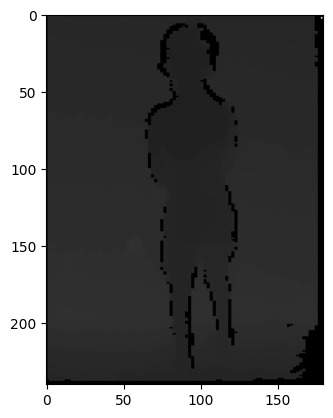

In [22]:
_ = plt.imshow(np.squeeze(depthmaps), cmap='gray')
plt.show()

In [23]:
target

{'file_path': '1666394012795/699b206d-b803-4f9e-a98b-5a88ce70817a',
 'timestamp': '2022-10-21-23-13-32-802709',
 'scan_id': '00cafa40-5196-11ed-b963-d7a855a78d99',
 'scan_step': 102,
 'scan_version': 'v0.8',
 'height': 99.7,
 'weight': 14.5,
 'muac': 15.5,
 'order_number': 1.0,
 'format': 'depth',
 'artifact': 'fb648800-5195-11ed-b963-7bfbb3753630',
 'depth_artifact_id': '00cafa41-5196-11ed-b963-6b6fa55167d8',
 'device_model': 'HUAWEI VOG-L29',
 'person_id': '000f4b60-5196-11ed-b963-8773b91b334d',
 'age': 1412,
 'sex': 'female',
 'zscore_wfh': -0.48,
 'diagnosis_wfh': 'Healthy',
 'zscore_lhfa': -0.49,
 'diagnosis_lhfa': 'Not Stunted',
 'device_pose': [-0.20222282834751706,
  -0.9792864980472983,
  -0.010192273416156904,
  0.0,
  0.10575357336405519,
  -0.03218220253326928,
  0.9938714643055414,
  0.0,
  -0.9736129155962672,
  0.19990562919129287,
  0.11007102253440405,
  0.0,
  -0.031173699,
  0.0026363838,
  -0.080508426,
  1.0],
 'raw_header': '240x180_0.001_7_-0.4242335_0.51477695_0

## Analysis

In [24]:
print("Total no. of artifacts:", len(df))
unique_scan_ids = df.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = df.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 469694
Total no. of unique scan ids: 24500
Total no. of unique person ids: 12426


device_model
HUAWEI VOG-L29    469694
Name: count, dtype: int64


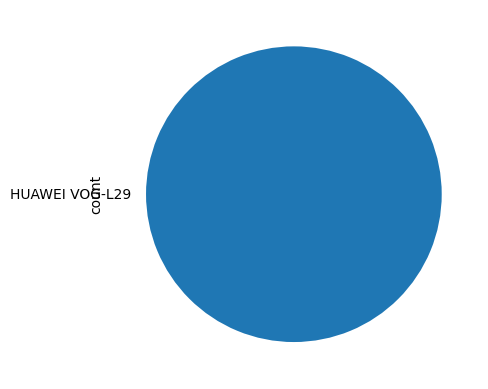

In [25]:
print(df['device_model'].value_counts())
_ = df['device_model'].value_counts().plot(kind='pie')

scan_version
v1.2.0    247987
v0.8      218953
v0.9        2754
Name: count, dtype: int64


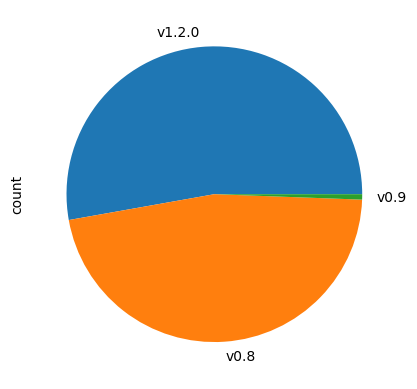

In [26]:
print(df['scan_version'].value_counts())
_ = df['scan_version'].value_counts().plot(kind='pie')

Years
0    1409
1    2886
2    2514
3    2717
4    2883
5      17
Name: count, dtype: int64


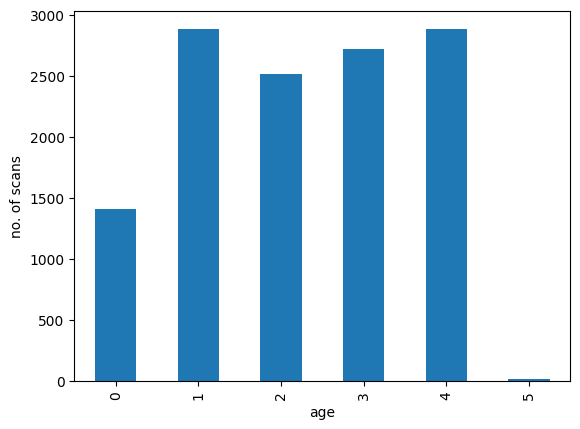

In [27]:
draw_age_distribution(unique_person_ids)

Years
0    2757
1    5531
2    5069
3    5442
4    5671
5      30
Name: count, dtype: int64


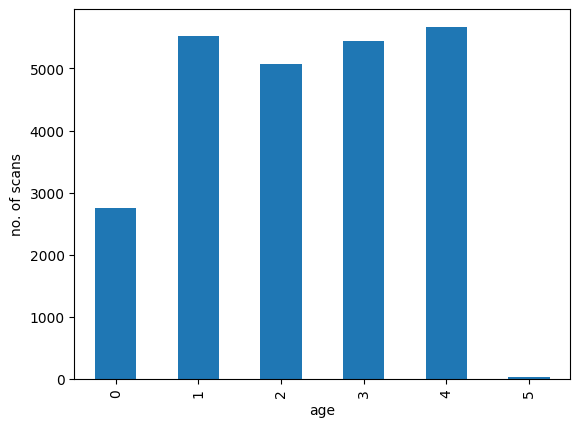

In [28]:
draw_age_distribution(unique_scan_ids)

scan_step
101    201452
201     74761
102     71036
100     70374
200     26308
202     25763
Name: count, dtype: int64


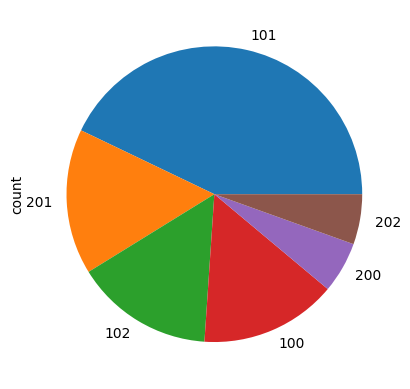

In [29]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df['scan_step'].value_counts())
_ = df['scan_step'].value_counts().plot(kind='pie')

In [30]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(df, scan_type_colname)

2023-06-26 09:45:39,077 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/rbanka2/code/Users/rbanka/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
101,2357,21263,55448,57885,64109
100,888,7510,18730,20665,22438
102,828,7673,19037,20722,22614
202,9982,14746,783,198,54
200,10127,15167,744,171,99
201,28607,43282,2028,598,246


### Distribution of height, weight and age against each other

In [31]:
unique_scan_ids.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,artifact,depth_artifact_id,device_model,person_id,age,sex,zscore_wfh,diagnosis_wfh,zscore_lhfa,diagnosis_lhfa,Years
0,1666261245701/e38a7e90-f7a5-4450-bdf4-cb42f20f...,2022-10-20-10-20-45-716142,ec731180-5060-11ed-b963-33833fbbbfa4,101,v0.8,110.1,18.60,16.1,1.0,depth,dc0a52e0-5060-11ed-b963-6304f6be8d3c,ec731181-5060-11ed-b963-d32f1d7a7623,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4
26,1666261269220/e5bed739-fe90-4ed0-93a7-84478c28...,2022-10-20-10-21-09-232042,ed17dd00-5060-11ed-b963-3f31234821f0,100,v0.8,110.1,18.60,16.1,1.0,depth,ea0f30e0-5060-11ed-b963-2b0957128dc6,ed17dd01-5060-11ed-b963-9b9a2215447a,HUAWEI VOG-L29,eb92c3a0-5060-11ed-b963-5bba01bfc722,1792,male,0.03,Healthy,0.16,Not Stunted,4
35,1666261465523/35157a05-081a-479f-a542-5d369665...,2022-10-20-10-24-25-532026,70e10bc0-5061-11ed-b963-eb8d4373c235,102,v0.8,80.0,9.30,13.1,1.0,depth,5f1031a0-5061-11ed-b963-fba339c1db55,70e10bc1-5061-11ed-b963-9f99d7c0a329,HUAWEI VOG-L29,709c61a0-5061-11ed-b963-bb710d66eb84,814,female,-1.09,Healthy,-2.40,Moderately Stunted,2
44,1666261487298/41ba876f-8895-4200-aab4-67bc1f5a...,2022-10-20-10-24-47-314168,71398c00-5061-11ed-b963-dbd3d73869f0,101,v0.8,80.0,9.30,13.1,1.0,depth,6c0b8ee0-5061-11ed-b963-031d7c3e6808,713b12a0-5061-11ed-b963-4bab84291beb,HUAWEI VOG-L29,709c61a0-5061-11ed-b963-bb710d66eb84,814,female,-1.09,Healthy,-2.40,Moderately Stunted,2
70,1666261419198/ae87e3e4-3a52-4399-ad73-f0553107...,2022-10-20-10-23-39-218793,48ee9b00-5061-11ed-b963-6bfea390cf34,102,v0.8,92.4,11.65,13.6,1.0,depth,437452a0-5061-11ed-b963-c7c6b55ac501,48f1a840-5061-11ed-b963-77bada4956eb,HUAWEI VOG-L29,47b8da20-5061-11ed-b963-cbca837d6d1e,1788,male,-1.83,Healthy,-3.68,Severely Stunted,4


In [35]:
unique_scan_ids.shape

(24500, 21)

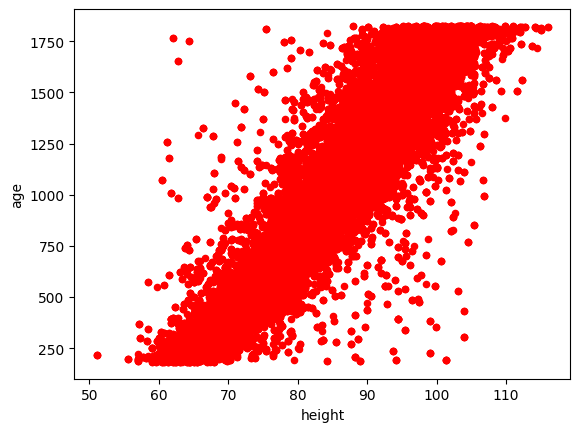

In [32]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')

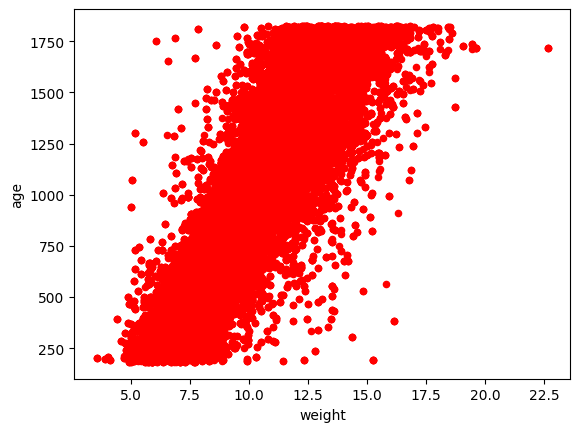

In [33]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

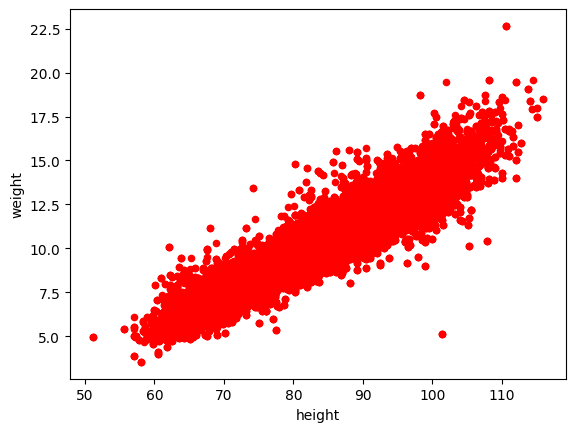

In [34]:
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

### Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [36]:
df.describe()

,scan_step,height,weight,muac,order_number,age,zscore_wfh,zscore_lhfa,Years
count,469694.000000,469694.000000,469694.000000,469694.000000,469694.000000,469694.000000,469694.000000,469694.000000,469694.000000
mean,128.003362,84.351867,10.079137,13.435336,10.136500,1006.733810,-1.675653,-2.158139,2.226158
std,44.399480,11.576290,2.555460,1.075446,7.521807,485.403887,1.128787,1.468429,1.338511
min,100.000000,51.100000,3.550000,9.000000,1.000000,183.000000,-9.540000,-10.270000,0.000000
25%,101.000000,75.000000,8.100000,12.700000,4.000000,573.000000,-2.430000,-2.960000,1.000000
50%,101.000000,85.000000,10.050000,13.400000,8.000000,999.000000,-1.840000,-2.180000,2.000000
75%,200.000000,93.800000,11.950000,14.100000,16.000000,1435.000000,-0.930000,-1.400000,3.000000
max,202.000000,116.000000,22.650000,18.500000,104.000000,1825.000000,5.210000,15.520000,5.000000


In [37]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,order_number,age,zscore_wfh,zscore_lhfa,Years
count,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000
mean,127.134857,84.521804,10.341923,13.623788,1.610204,1011.136367,-1.389036,-2.129304,2.237918
std,43.942565,11.544478,2.579023,1.064970,2.595539,483.520242,1.099359,1.485201,1.333554
min,100.000000,51.100000,3.550000,9.000000,1.000000,183.000000,-9.540000,-10.270000,0.000000
25%,101.000000,75.200000,8.300000,13.000000,1.000000,582.000000,-2.140000,-2.930000,1.000000
50%,102.000000,85.200000,10.300000,13.500000,1.000000,1014.000000,-1.410000,-2.150000,2.000000
75%,200.000000,93.900000,12.250000,14.300000,1.000000,1433.000000,-0.690000,-1.370000,3.000000
max,202.000000,116.000000,22.650000,18.500000,22.000000,1825.000000,5.210000,15.520000,5.000000


### 1) check age

In [38]:
find_outliers(df, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [39]:
find_outliers(df, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [40]:
find_outliers(df, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) check weight

In [41]:
find_outliers(df, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 67


['47592260-506b-11ed-b963-6b4d8eb907a7',
 '4780cea0-506b-11ed-b963-5fa8e33591fc',
 '47e0f000-506b-11ed-b963-bb0468e15c7d',
 'd5c78421-5141-11ed-b963-7782e87affc5',
 'd616dca0-5141-11ed-b963-3fbc3fd2042d',
 'd6eaf580-5141-11ed-b963-638bc3685953',
 'fbf1e900-5197-11ed-b963-b33a384976b7',
 '9a60a4e1-5211-11ed-b963-93f221d88d2d',
 '9ad315c0-5211-11ed-b963-03bf41a130fe',
 '9b3951a0-5211-11ed-b963-835d2d1ecf65',
 '4382a361-5236-11ed-b963-b766699b1c88',
 '43f9a820-5236-11ed-b963-e3210b3ced23',
 '446f2640-5236-11ed-b963-73cb7fc224b8',
 '38e77c41-5241-11ed-b963-abcdb0a9779c',
 '3a04d320-5241-11ed-b963-93d6250a25f2',
 '3a75bd60-5241-11ed-b963-fb9f5abce11f',
 '1939bee0-528b-11ed-b963-d38d4ac4136d',
 '1a589c60-528b-11ed-b963-f741880cf6b1',
 '1b1bec60-528b-11ed-b963-0b14138b70a5',
 'b27f8c80-529d-11ed-b963-8bb8eb53561b',
 'b2ed6980-529d-11ed-b963-7bc8a1ca054b',
 'b35ccd20-529d-11ed-b963-e34cbd3bd9f0',
 '6ed8eda1-52fc-11ed-b963-ef21e0767581',
 '6f4b5e80-52fc-11ed-b963-3b5d7a52454e',
 'a0d82ec0-531e-

In [42]:
find_outliers(df, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

### 3) check height

In [43]:
find_outliers(df, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [44]:
find_outliers(df, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]

In [45]:
# now close the mount context
mount_ctx.stop()